PARACHUTE PROBLEM

In [ ]:
import matplotlib.pyplot as plt 
import math as m
import numpy as np

Modelling the problem and non-dimensionalization

$$
m\frac{dv}{dt}=mg-bv^2\\
\frac{dv}{dt}=g-\frac{b}{m}v^2   \_\_\_\_ (1)
$$
Finding natural scale of time ($t_0$) and velocity ($v_0$) \\
[g]=$LT^{-2}$   ,  [$\frac{b}{m}$]=$L^{-1}$ \\

$$
[g]=[\frac{b}{m}]T^{-2} \\
T=\sqrt\frac{m}{gb} \\
LT^{-1}=\frac{m}{b}\sqrt\frac{m}{gb}
$$
thus, we have determined the natural time scale $t_0$ and natural velocity  scale $v_0$ \\
Now,Define dimensionless time variable $\tau$(time measured in units of $t_0$) as $\tau=t/t_0$ and determine dimensionless fractional velocity(velocity measured in units of $v_o$) as $\nu$=$\frac{v}{v_0}$ \\
now eq 1 becomes \\
$$
\frac{v_0}{t_0}\frac{d\nu}{d\tau}=g-\frac{b}{m}v_0^2\nu^2 \\
g\frac{d\nu}{d\tau}=g-g\nu^2 \\
\frac{d\nu}{d\tau}=1-\nu^2
$$


EULER'S METHOD

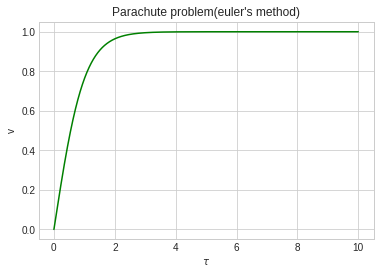

In [ ]:
#EULER'S METHOD
vel=0 #initial velocity
tau = 0 # Initial instant
tau_final = 10. # Instant up to which computation is to be done
delta_tau = 0.001 # Time slice
N = int(tau_final/delta_tau) # Number of slices
vels = [vel]
taus = [tau]
#iterative steps
for step in range(0,N):
    vel += delta_tau *(1-vel**2)
    tau += delta_tau
    vels.append(vel)
    taus.append(tau)
#plotting the values
plt.xlabel(r'$\tau$') # Label of 'x' axis
plt.ylabel('v') # Label of 'y' axis
plt.style.use('seaborn-whitegrid')
plt.title("Parachute problem(euler's method)") # Title of plot
plt.grid(True)
plt.plot(taus, vels,color='green')


RK2 METHOD

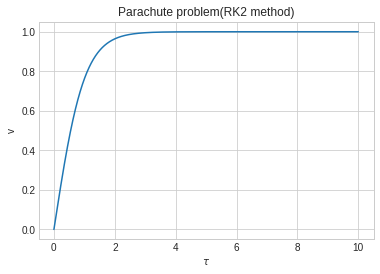

In [ ]:
#RK2 METHOD
def d(v): # define derivative
  return 1-v**2
vel=0 #initial velocity 
tau=0 #initial instant
tau_final = 10. # Instant up to which computation is to be done
delta_tau = 0.001 # Time slice
N = int(tau_final/delta_tau) # Number of slices
vels_rk2 = [vel]
taus_rk2 = [tau]
#iterative steps
for step in range(0,N):
  k1=delta_tau*(1-vel**2)
  k2=delta_tau*d(vel+0.5*k1)
  vel+=k2
  tau+=delta_tau
  vels_rk2.append(vel)
  taus_rk2.append(tau)
#plotting the values
plt.xlabel(r'$\tau$') # Label of 'x' axis
plt.ylabel('v') # Label of 'y' axis
plt.style.use('seaborn-whitegrid')
plt.title("Parachute problem(RK2 method)") # Title of plot
plt.plot(taus_rk2, vels_rk2)   
plt.grid(True)

EXACT ANALYTICAL SOLUTION \\
our derived differential equation, \\
$$
\frac{d\nu}{d\tau}=1-\nu^2 \\
$$
by variable seperable method, \\
$$
\frac{d\nu}{1-\nu^2}=d\tau \\
$$ 
integrating on both sides, \\
$$
\frac{1}{2}log|\frac{1+\nu}{1-\nu}|=\tau+c \\
$$ \\
$\nu$($\tau$=0)=0 \\

$$
\frac{1}{2}log1=0+c \\
c=0 \\
\frac{1}{2}log|\frac{1+\nu}{1-\nu}|=\tau \\
\frac{1+\nu}{1-\nu}=e^{2t} \\
$$
by C&D Rule,
$$
\frac{2}{2\nu}=\frac{e^{2t}+1}{e^{2t}-1} \\
\nu=\frac{e^{2t}+1}{e^{2t}-1} \\
$$

In [ ]:
#analytical solution
def velocity(t):
  return ((m.exp(2*t)-1)/(m.exp(2*t)+1))

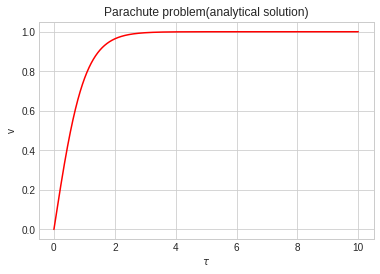

In [ ]:
vels_exact=[]
for i in taus:
  vels_exact.append(velocity(i))
#plotting the solution
plt.xlabel(r'$\tau$') # Label of 'x' axis
plt.ylabel('v') # Label of 'y' axis
plt.style.use('seaborn-whitegrid')
plt.title("Parachute problem(analytical solution)") # Title of plot
plt.plot(taus, vels_exact,color='red')   
plt.grid(True)  

PLOTTING SOLUTIONS FROM ALL THE METHODS SIMULTANEOUSLY

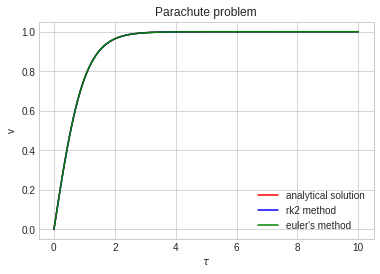

In [ ]:
plt.xlabel(r'$\tau$') # Label of 'x' axis
plt.ylabel('v') # Label of 'y' axis
plt.style.use('seaborn-whitegrid')
plt.title("Parachute problem") # Title of plot
plt.plot(taus,vels_exact,label='analytical solution',color='red')
plt.plot(taus_rk2,vels_rk2,label='rk2 method',color='blue')
plt.plot(taus,vels,label="euler's method",color='green')
plt.legend(loc='lower right') 
plt.grid(True)  
plt.show()

### Coupled first order differential equations

Consider the copled equations

\begin{eqnarray}
\frac{dx}{dt} &=& f(x,y,t) \\
\frac{dy}{dt} &=& g(x,y,t)
\end{eqnarray}
The above ideas can easily be extended. For instance

\begin{eqnarray}
x(t+\Delta t) & \simeq & x(t) + \Delta t \ f\left(\ x(t+\Delta t/2),\ y(t+\Delta t/2), \ t+\Delta t/2 \ \right) \\
& \simeq & x(t) + \Delta t \ f\left(\ x(t)+\Delta t/2 \ \dot{x},y(t)+\Delta t/2  \ \dot{y}, t+\Delta t/2 \ \right) \\
&=& x(t) + \Delta t \ f\left(\ x(t)+\Delta t/2 \ f(x,y,t), \ y(t)+\Delta t/2  \ g(x,y,t),\ t+\Delta t/2 \ \right)
\end{eqnarray}
Similarly
$$ y(t+\Delta t) \simeq y(t) + \Delta t \ g\left(\ x(t)+\Delta t/2 \ f(x,y,t), \ y(t)+\Delta t/2  \ g(x,y,t),\ t+\Delta t/2 \ \right) $$
The corresponding algorithm is
\begin{eqnarray}
k_1 &=& \Delta t \ f(x,y,t) \\
q_1 &=& \Delta t \ g(x,y,t) \\
k_2 &=& \Delta t \ f\left(x+k_1/2, y+q_1/2, t+\Delta t/2\right) \\
q_2 &=& \Delta t \ g\left(x+k_1/2, y+q_1/2, t+\Delta t/2\right) \\
x(t+\Delta t) &=& x(t) + k_2 \\
y(t+\Delta t) &=& y(t) + q_2 
\end{eqnarray}

### Example: Pendulum

The coupled equations are:
\begin{eqnarray}
\frac{d\theta}{d\tau} &=& v \\
\frac{dv}{d\tau} &=& -4 \pi^2 \sin\theta - bv
\end{eqnarray}
Here, $ f(\theta, v, \tau) = v $ and $g(\theta, v, \tau) = -4 \pi^2 \sin\theta - bv$

In [ ]:
b = 0.1

def f(theta, v, tau):
    return v

def g(theta, v, tau):
    return(-4.*m.pi**2 * m.sin(theta) - b*v)

In [ ]:
theta = 0.1
v = 0
E = 0.5*v**2 + 4*m.pi**2*(1-m.cos(theta))
tau = 0
tau_final = 20
delta_tau = 0.001
N_slices = int(tau_final/delta_tau)
thetas = [theta]
vels = [v]
Es = [E]
taus = [tau]

In [ ]:
for i in range(N_slices):
  k1 = delta_tau * f(theta, v, tau)
  q1 = delta_tau * g(theta, v, tau)
  k2 = delta_tau*f(theta+k1/2, v+q1/2, tau+delta_tau/2)
  q2 = delta_tau*g(theta+k1/2, v+q1/2, tau+delta_tau/2)
  theta += k2
  v += q2
  E = 0.5*v**2 + 4*m.pi**2*(1-m.cos(theta))
  tau += delta_tau
  thetas.append(theta)
  vels.append(v)
  Es.append(E)
  taus.append(tau)

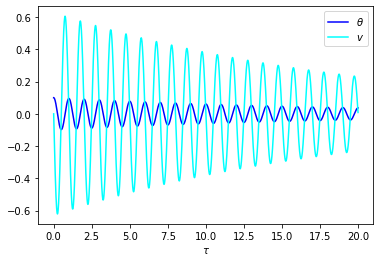

In [ ]:
plt.xlabel(r'$\tau$')
plt.plot(taus, thetas, linestyle='-', color='blue', label=r'$\theta$')
plt.plot(taus, vels, linestyle='-', color='cyan', label=r'$v$')
plt.legend();

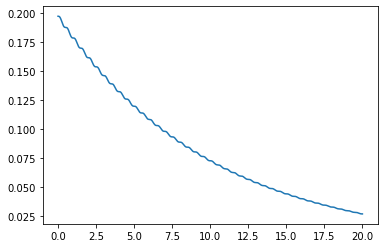

In [ ]:
plt.plot(taus, Es);

## The Chaotic Pendulum

### Equation of motion

$$ \frac{d^2 \theta}{d\tau^2} + \left(\frac{1}{Q}\right) \frac{d\theta}{d\tau} + \sin\theta = A \cos(\omega \tau) $$

### This is equivalent to coupled differential equations
\begin{align}
\frac{d\theta}{d\tau} &= f(\theta,v,\tau) \\
\frac{dv}{d\tau} &= g(\theta,v,\tau) 
\end{align}
where 
$$ f(\theta, v, \tau) = v$$ and $$ g(\theta, v, \tau) = -\sin\theta - \frac{v}{Q} + A \cos\omega\tau$$

In [ ]:
def f(v):
  return v
def g(theta,v,tau):
  return  (A*m.cos(omega*tau)-1/q*v-m.sin(theta))

In [ ]:
A=1.5
omega=2/3
theta_init=0
v_init=0
q=0.5
tau_init=0
delta_tau=0.001
tau_final=50
N=int(tau_final/delta_tau)
tau=tau_init
v=v_init
theta=theta_init
thetas=[theta]
taus=[tau]
vels=[v]

In [ ]:
for i in range(N):
  k1 = delta_tau * f(v)
  q1 = delta_tau * g(theta, v, tau)
  k2 = delta_tau*f(v+q1/2)
  q2 = delta_tau*g(theta+k1/2, v+q1/2, tau+delta_tau/2)
  theta += k2
  v += q2
  tau += delta_tau
  thetas.append(theta)
  vels.append(v)
  taus.append(tau)

Text(0, 0.5, '$\\theta$')

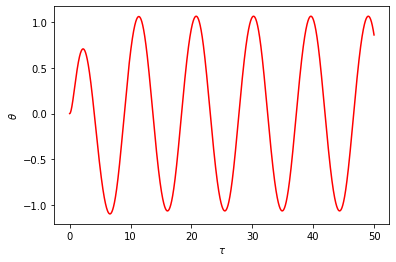

In [ ]:
plt.plot(taus,thetas,color='red')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\theta$')

Text(0, 0.5, 'v')

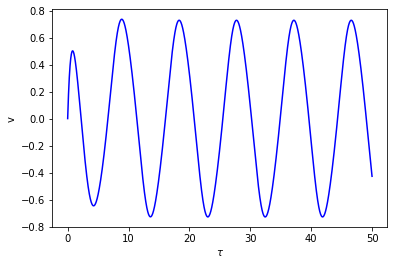

In [ ]:
plt.plot(taus,vels,color='blue')
plt.xlabel(r'$\tau$')
plt.ylabel('v')

Text(0.5, 0, '$\\theta$')

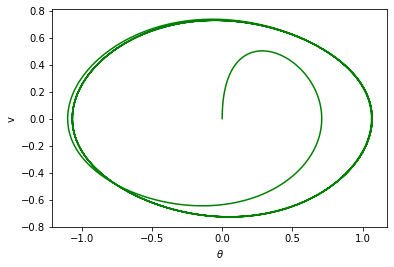

In [ ]:
plt.plot(thetas,vels,color='green')
plt.ylabel('v')
plt.xlabel(r'$\theta$')

In [ ]:
import math

In [ ]:
omega = 2/3
 
def f(v):
    return v
 
def g(theta, v, tau, Q, A):
    return -math.sin(theta) - v/Q + A*math.cos(omega*tau)

In [ ]:
def RK2(theta0, v0, tau_final, delta_tau, Q, A, late=True):
    
    N_slices = int(tau_final/delta_tau)
    thetas = []  
    vs = []  
    taus = [] 
    
    theta = theta0
    v = v0
    tau = 0. 
    
    for i in range(N_slices):
        k1 = delta_tau * f(v)
        q1 = delta_tau * g(theta, v, tau, Q, A)
        k2 = delta_tau*f(v+q1/2)
        q2 = delta_tau*g(theta+k1/2, v+q1/2, tau+delta_tau/2, Q, A)
        theta += k2
        v += q2
        tau += delta_tau
        if late == True:
            if tau > tau_final/2:
                thetas.append(theta)
                vs.append(v)
                taus.append(tau)
        else:
            thetas.append(theta)
            vs.append(v)
            taus.append(tau)
    return thetas, vs, taus

UNDAMPED,UNFORCED PENDULUM WITH SMALL AMPLITUDE

In [ ]:
thetas, vs, taus = RK2(0.1, 0., 20, 0.01, Q = float('inf'), A = 0, late=False)

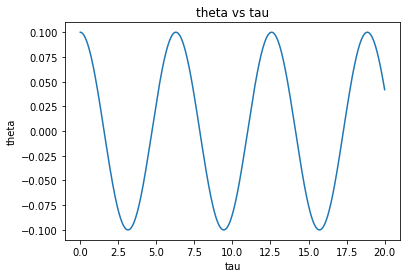

In [ ]:
plt.xlabel('tau')
plt.ylabel('theta')
plt.plot(taus, thetas)
plt.title('theta vs tau');

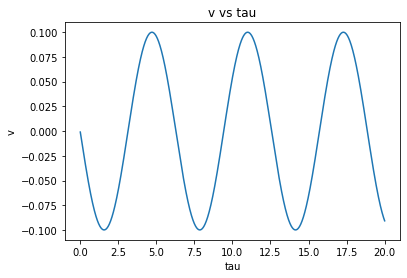

In [ ]:
plt.xlabel('tau')
plt.ylabel('v')
plt.plot(taus, vs)
plt.title('v vs tau');

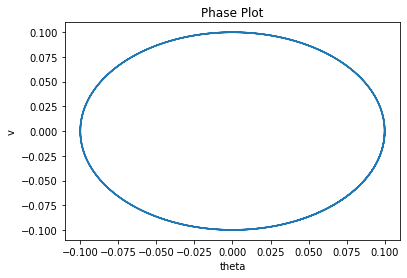

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

UNFORCED DAMPED OSCILLATOR

In [ ]:
thetas, vs, taus = RK2(0.1, 5, 20, 0.01, Q = 0.5, A = 0, late=False)

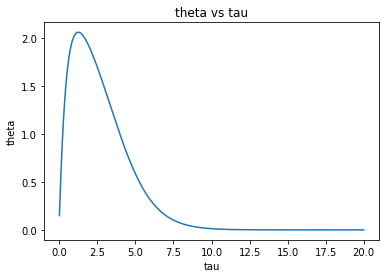

In [ ]:
plt.xlabel('tau')
plt.ylabel('theta')
plt.plot(taus, thetas)
plt.title('theta vs tau');

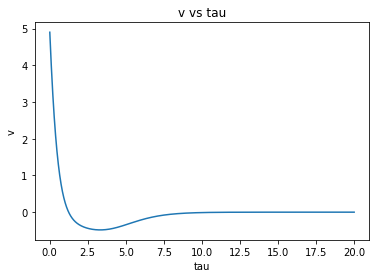

In [ ]:
plt.xlabel('tau')
plt.ylabel('v')
plt.plot(taus, vs)
plt.title('v vs tau');

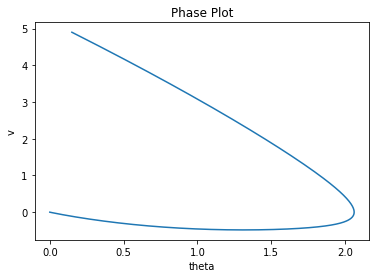

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2((math.pi)/4, 2., 20, 0.01, Q = 0.5, A = 1.5, late=False)

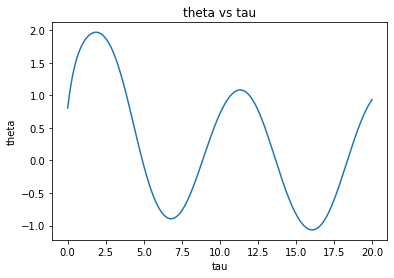

In [ ]:
plt.xlabel('tau')
plt.ylabel('theta')
plt.plot(taus, thetas)
plt.title('theta vs tau');

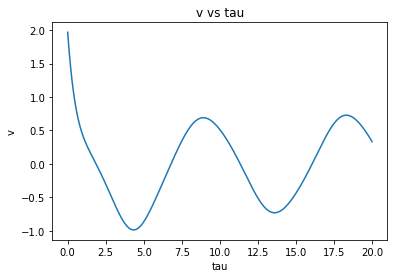

In [ ]:
plt.xlabel('tau')
plt.ylabel('v')
plt.plot(taus, vs)
plt.title('v vs tau');

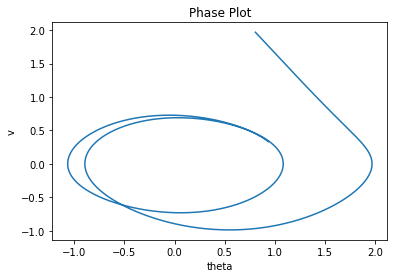

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 0, 20, 0.01, Q = 0.8, A = 1.5, late=False)

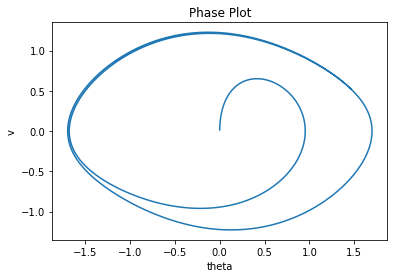

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 0, 20, 0.01, Q = 0.8, A = 1.5, late=False)

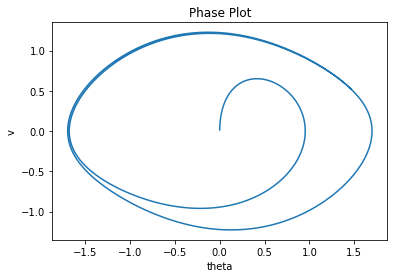

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 0, 20, 0.01, Q = 1, A = 1.5, late=False)

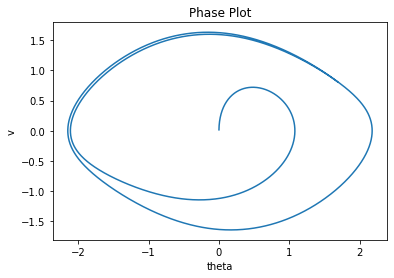

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 0, 20, 0.01, Q = 1.2, A = 1.5, late=False)

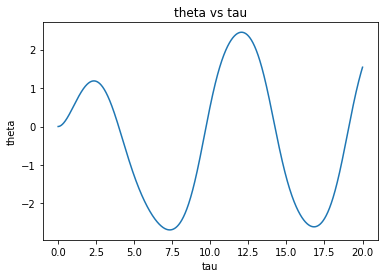

In [ ]:
plt.xlabel('tau')
plt.ylabel('theta')
plt.plot(taus, thetas)
plt.title('theta vs tau');

BUTTERFLY EFFECT

In [ ]:
thetas, vs, taus = RK2(0, -2., 100, 0.01, Q = 1.3, A = 1.5, late=True)

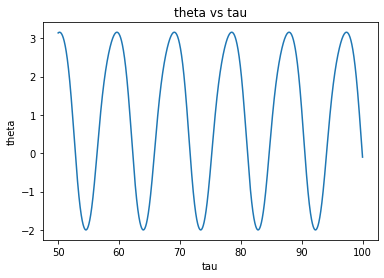

In [ ]:
plt.xlabel('tau')
plt.ylabel('theta')
plt.plot(taus, thetas)
plt.title('theta vs tau');

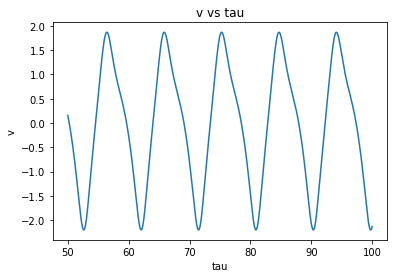

In [ ]:
plt.xlabel('tau')
plt.ylabel('v')
plt.plot(taus, vs)
plt.title('v vs tau');

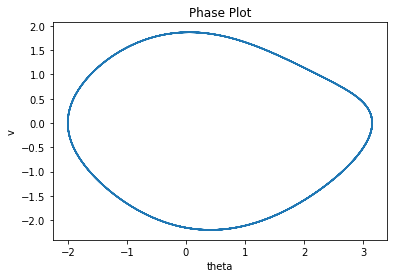

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -1.5, 100, 0.01, Q = 1.3, A = 1.5, late=True)

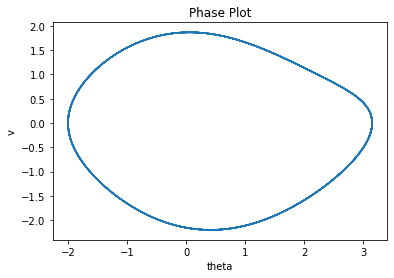

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -1.25, 100, 0.01, Q = 1.3, A = 1.5, late=True)

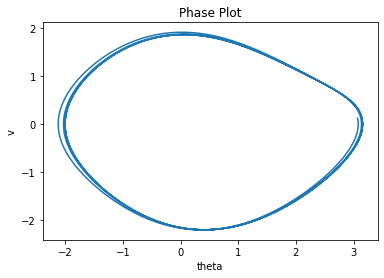

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -1.0625, 100, 0.01, Q = 1.3, A = 1.5, late=True)

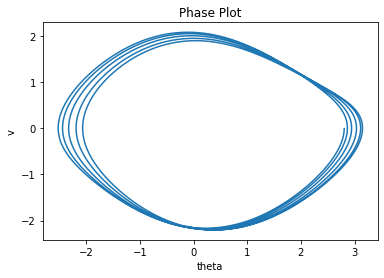

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -1.03, 100, 0.01, Q = 1.3, A = 1.5, late=True)

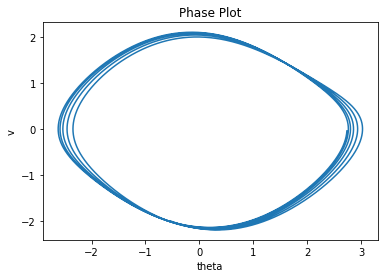

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -1.015, 100, 0.01, Q = 1.3, A = 1.5, late=True)

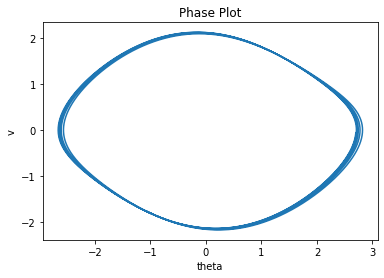

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -1.0075, 100, 0.01, Q = 1.3, A = 1.5, late=True)

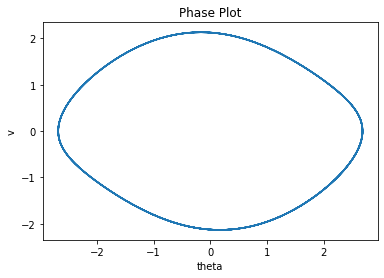

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -1.00375, 100, 0.01, Q = 1.3, A = 1.5, late=True)

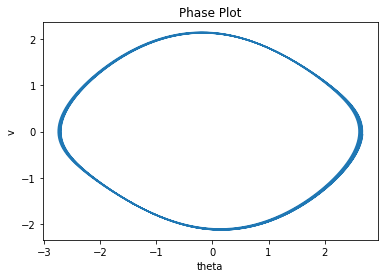

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -1.0009375, 100, 0.01, Q = 1.3, A = 1.5, late=True)

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -1, 100, 0.01, Q = 1.3, A = 1.5, late=True)

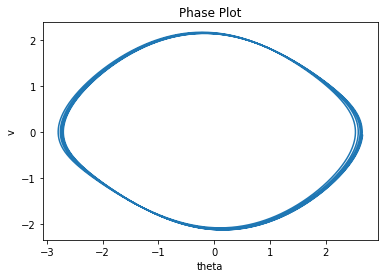

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -0.5, 100, 0.01, Q = 1.3, A = 1.5, late=True)

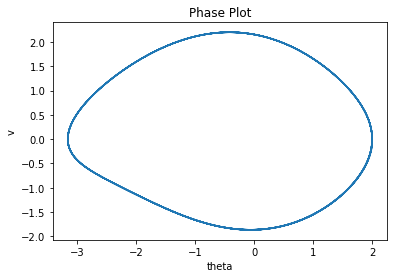

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -0.25, 100, 0.01, Q = 1.3, A = 1.5, late=True)

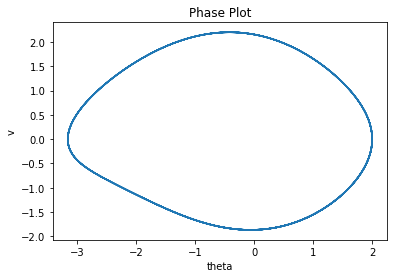

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -0.0625, 100, 0.01, Q = 1.3, A = 1.5, late=True)

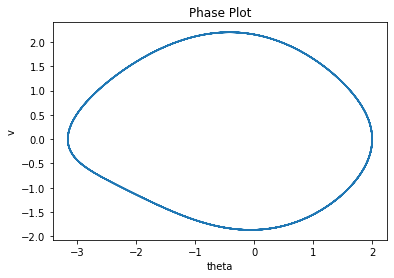

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -0.03125, 100, 0.01, Q = 1.3, A = 1.5, late=True)

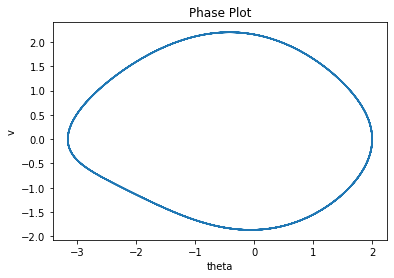

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -0.00156, 100, 0.01, Q = 1.3, A = 1.5, late=True)

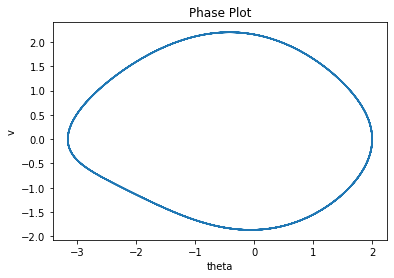

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -0.00078125, 100, 0.01, Q = 1.3, A = 1.5, late=True)

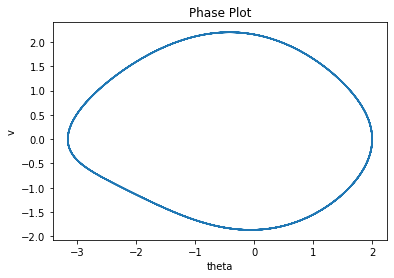

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, -0.000039, 100, 0.01, Q = 1.3, A = 1.5, late=True)

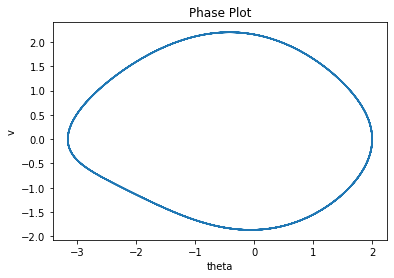

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 0, 100, 0.01, Q = 1.3, A = 1.5, late=True)

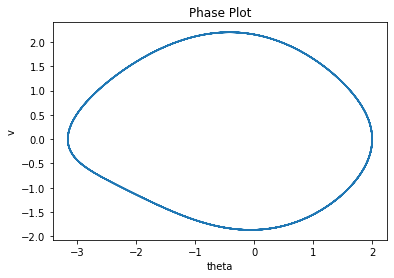

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 0.025, 100, 0.01, Q = 1.3, A = 1.5, late=True)

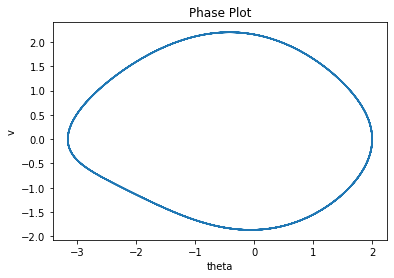

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 0.625, 100, 0.01, Q = 1.3, A = 1.5, late=True)

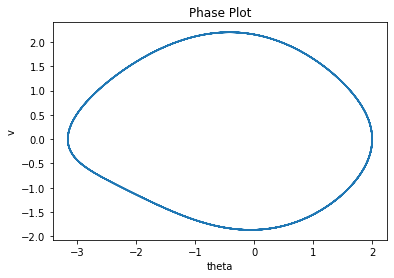

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 0.25, 100, 0.01, Q = 1.3, A = 1.5, late=True)

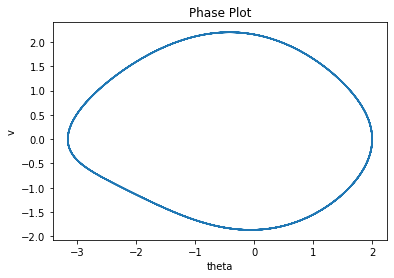

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 0.5, 100, 0.01, Q = 1.3, A = 1.5, late=True)

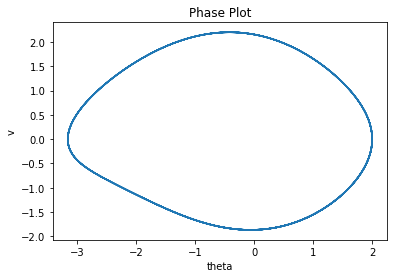

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1, 100, 0.01, Q = 1.3, A = 1.5, late=True)

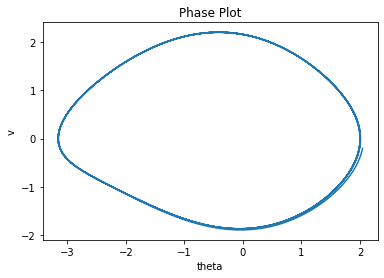

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.000039, 100, 0.01, Q = 1.3, A = 1.5, late=True)

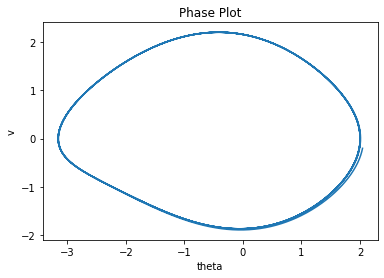

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.00078, 100, 0.01, Q = 1.3, A = 1.5, late=True)

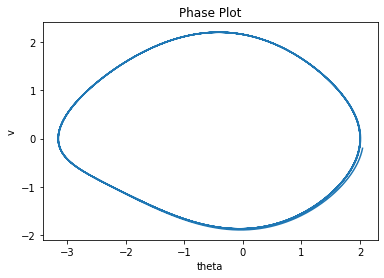

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.0015, 100, 0.01, Q = 1.3, A = 1.5, late=True)

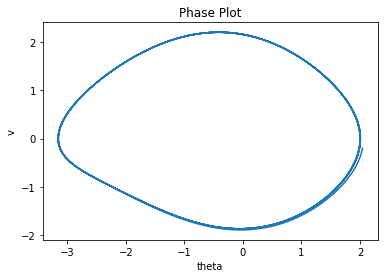

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.03, 100, 0.01, Q = 1.3, A = 1.5, late=True)

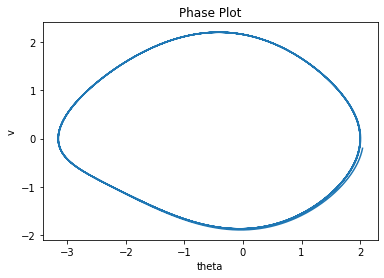

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.0625, 100, 0.01, Q = 1.3, A = 1.5, late=True)

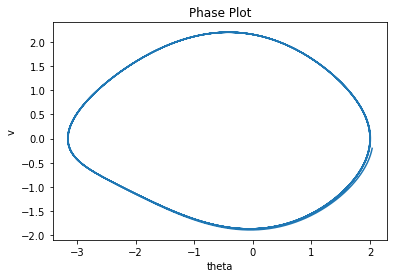

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.25, 100, 0.01, Q = 1.3, A = 1.5, late=True)

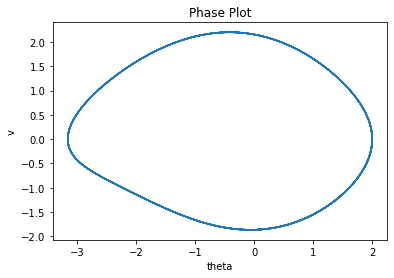

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.5, 100, 0.01, Q = 1.3, A = 1.5, late=True)

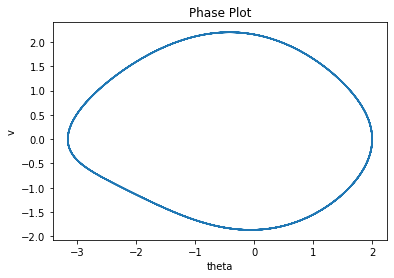

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.6, 100, 0.01, Q = 1.3, A = 1.5, late=True)

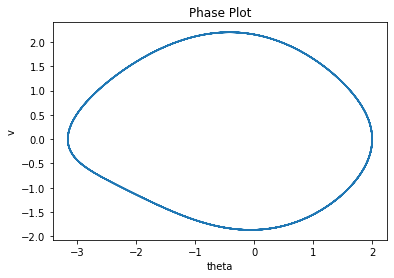

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.7, 100, 0.01, Q = 1.3, A = 1.5, late=True)

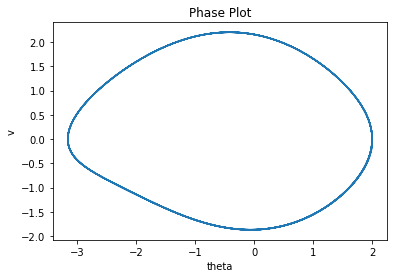

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.725, 100, 0.01, Q = 1.3, A = 1.5, late=True)

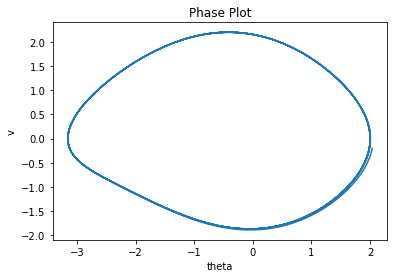

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.75, 100, 0.01, Q = 1.3, A = 1.5, late=True)

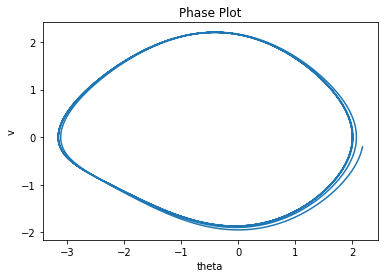

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.7525, 100, 0.01, Q = 1.3, A = 1.5, late=True)

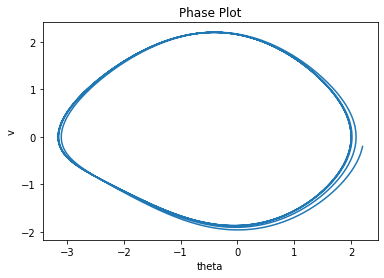

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.76, 100, 0.01, Q = 1.3, A = 1.5, late=True)

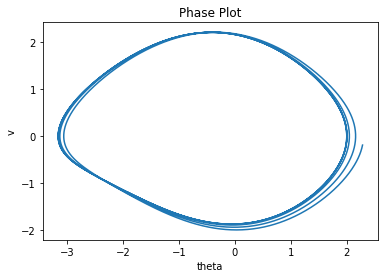

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.77, 100, 0.01, Q = 1.3, A = 1.5, late=True)

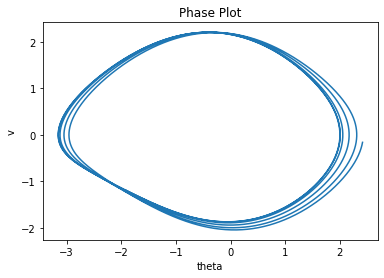

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.775, 100, 0.01, Q = 1.3, A = 1.5, late=True)

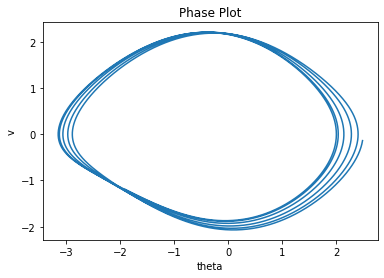

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.78, 100, 0.01, Q = 1.3, A = 1.5, late=True)

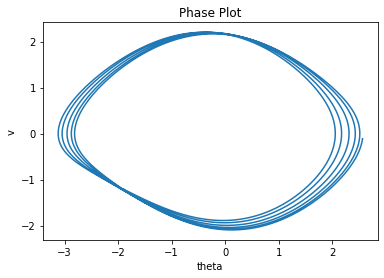

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.7825, 100, 0.01, Q = 1.3, A = 1.5, late=True)

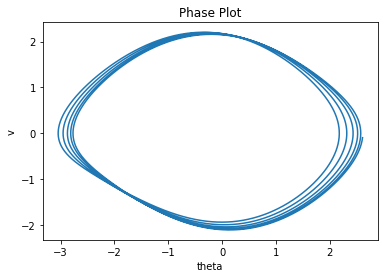

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.7835, 100, 0.01, Q = 1.3, A = 1.5, late=True)

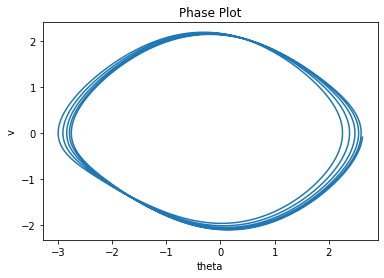

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.7845, 100, 0.01, Q = 1.3, A = 1.5, late=True)

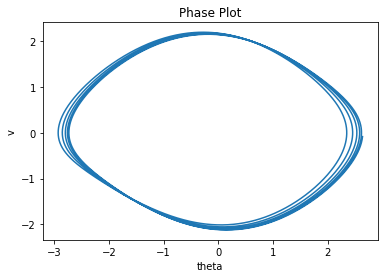

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.785, 100, 0.01, Q = 1.3, A = 1.5, late=True)

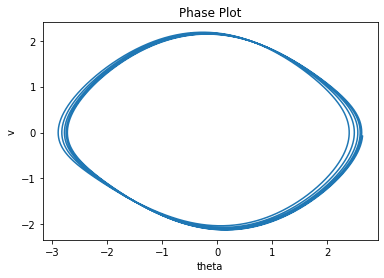

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.78525, 100, 0.01, Q = 1.3, A = 1.5, late=True)

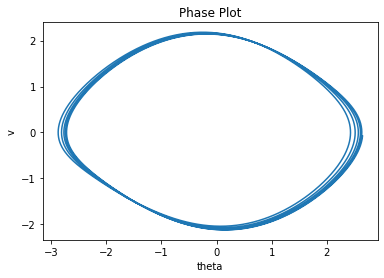

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.786, 100, 0.01, Q = 1.3, A = 1.5, late=True)

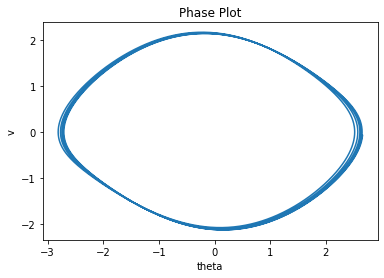

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.78625, 100, 0.01, Q = 1.3, A = 1.5, late=True)

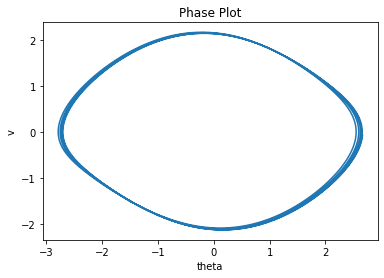

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.7865, 100, 0.01, Q = 1.3, A = 1.5, late=True)

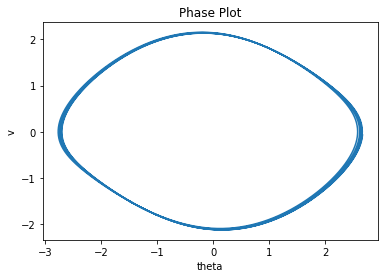

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.7885, 100, 0.01, Q = 1.3, A = 1.5, late=True)

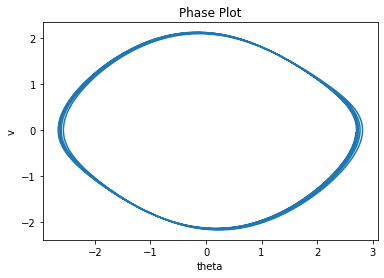

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.7895, 100, 0.01, Q = 1.3, A = 1.5, late=True)

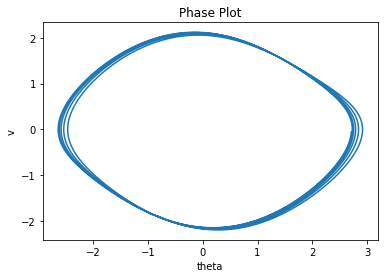

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.79, 100, 0.01, Q = 1.3, A = 1.5, late=True)

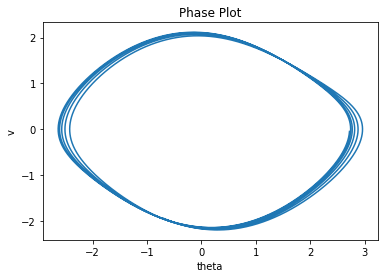

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.7925, 100, 0.01, Q = 1.3, A = 1.5, late=True)

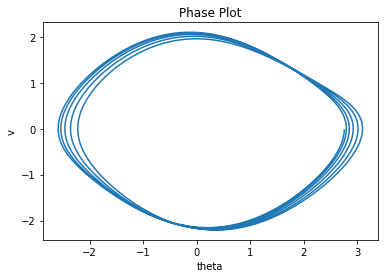

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.795, 100, 0.01, Q = 1.3, A = 1.5, late=True)

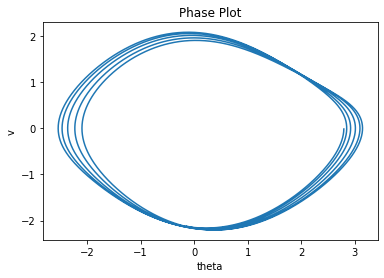

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.8, 100, 0.01, Q = 1.3, A = 1.5, late=True)

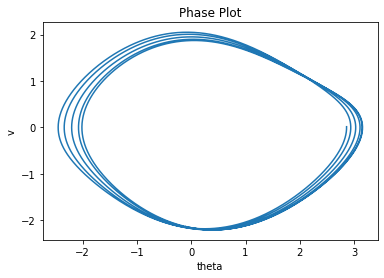

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.8025, 100, 0.01, Q = 1.3, A = 1.5, late=True)

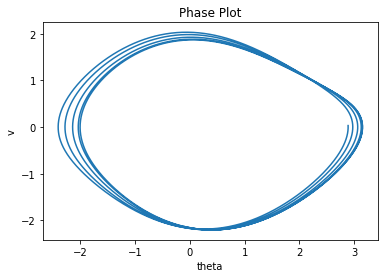

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.805, 100, 0.01, Q = 1.3, A = 1.5, late=True)

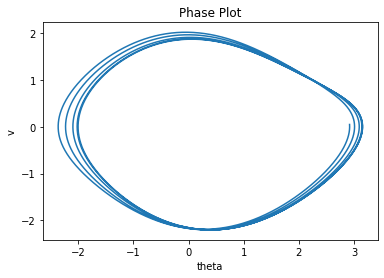

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.815, 100, 0.01, Q = 1.3, A = 1.5, late=True)

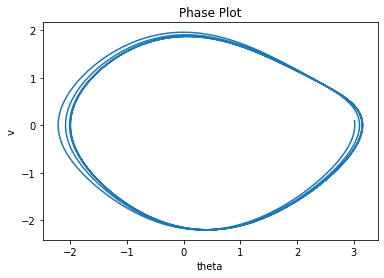

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.825, 100, 0.01, Q = 1.3, A = 1.5, late=True)

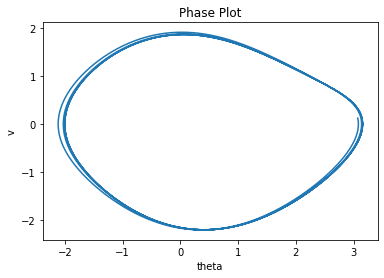

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.85, 100, 0.01, Q = 1.3, A = 1.5, late=True)

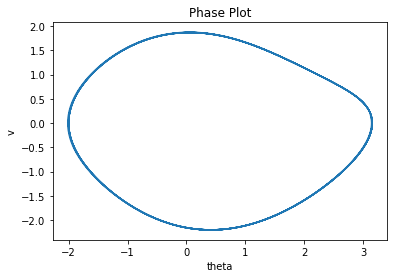

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.875, 100, 0.01, Q = 1.3, A = 1.5, late=True)

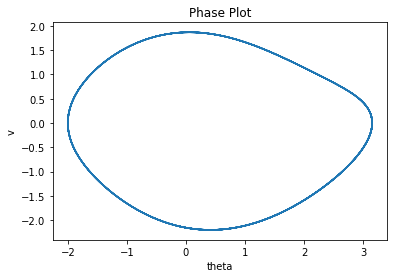

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.895, 100, 0.01, Q = 1.3, A = 1.5, late=True)

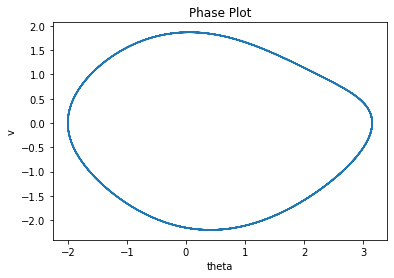

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.9, 100, 0.01, Q = 1.3, A = 1.5, late=True)

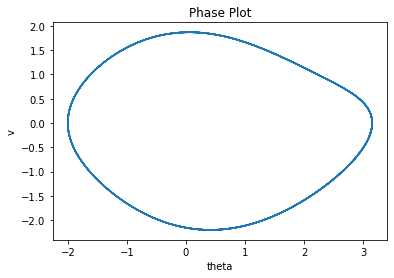

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 1.95, 100, 0.01, Q = 1.3, A = 1.5, late=True)

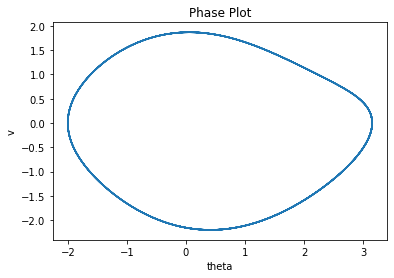

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
thetas, vs, taus = RK2(0, 2, 100, 0.01, Q = 1.3, A = 1.5, late=True)

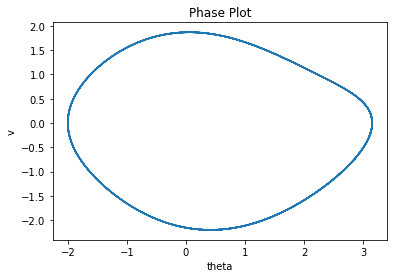

In [ ]:
plt.xlabel('theta')
plt.ylabel('v')
plt.plot(thetas, vs)
plt.title('Phase Plot');

In [ ]:
A=1.5
omega=2/3
theta_init=5
v_init=10
q=0.5
tau_init=0
delta_tau=0.001
tau_final=50
N=int(tau_final/delta_tau)
tau=tau_init
v=v_init
theta=theta_init
thetas=[theta]
taus=[tau]
vels=[v]
for i in range(N):
  k1 = delta_tau * f(v)
  q1 = delta_tau * g(theta, v, tau)
  k2 = delta_tau*f(v+q1/2)
  q2 = delta_tau*g(theta+k1/2, v+q1/2, tau+delta_tau/2)
  theta += k2
  v += q2
  tau += delta_tau
  thetas.append(theta)
  vels.append(v)
  taus.append(tau)




Text(0, 0.5, '$\\theta$')

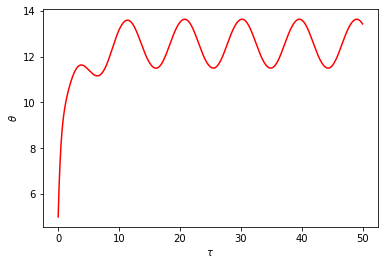

In [ ]:
plt.plot(taus,thetas,color='red')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\theta$')

Text(0, 0.5, 'v')

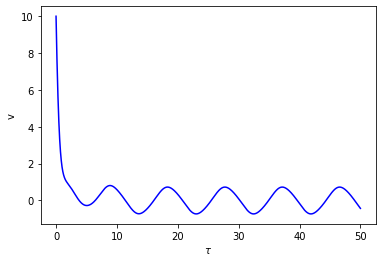

In [ ]:
plt.plot(taus,vels,color='blue')
plt.xlabel(r'$\tau$')
plt.ylabel('v')

Text(0.5, 0, '$\\theta$')

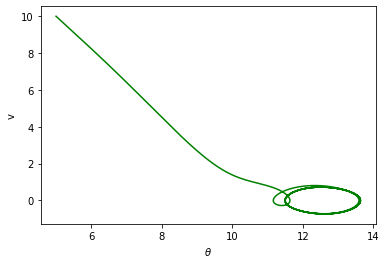

In [ ]:
plt.plot(thetas,vels,color='green')
plt.ylabel('v')
plt.xlabel(r'$\theta$')

In [ ]:
A=1.5
omega=2/3
theta_init=5
v_init=10
q=1.3
tau_init=0
delta_tau=0.001
tau_final=50
N=int(tau_final/delta_tau)
tau=tau_init
v=v_init
theta=theta_init
thetas=[theta]
taus=[tau]
vels=[v]
for i in range(N):
  k1 = delta_tau * f(v)
  q1 = delta_tau * g(theta, v, tau)
  k2 = delta_tau*f(v+q1/2)
  q2 = delta_tau*g(theta+k1/2, v+q1/2, tau+delta_tau/2)
  theta += k2
  v += q2
  tau += delta_tau
  thetas.append(theta)
  vels.append(v)
  taus.append(tau)

Text(0, 0.5, '$\\theta$')

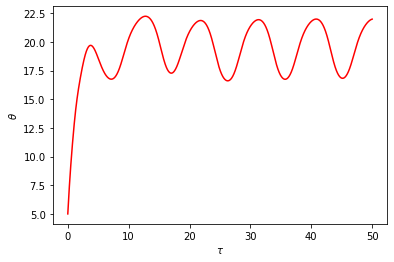

In [ ]:
plt.plot(taus,thetas,color='red')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\theta$')

Text(0, 0.5, 'v')

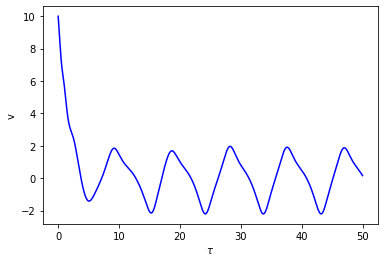

In [ ]:
plt.plot(taus,vels,color='blue')
plt.xlabel(r'$\tau$')
plt.ylabel('v')

Text(0.5, 0, '$\\theta$')

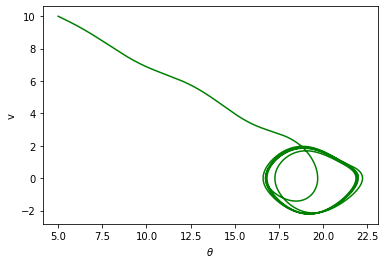

In [ ]:
plt.plot(thetas,vels,color='green')
plt.ylabel('v')
plt.xlabel(r'$\theta$')

**POINCARE SECTION** \\
Taking snapshots of the system when it's in phase with the external driver




In [ ]:
omega=2/3
def f(v):
   return v
def g(theta,v,tau,Q,A):
   return  (A*m.sin(omega*tau)-1/Q*v-m.sin(theta))


In [ ]:
def RK2(theta0, v0, tau_final, delta_tau, Q, A, late=True):
    theta = theta0
    v = v0
    tau = 0 
    N = int(tau_final/delta_tau)
    thetas = []  
    vs = []  
    taus = [] 
    
    for i in range(N):
        k1 = delta_tau * f(v)
        q1 = delta_tau * g(theta, v, tau, Q, A)
        k2 = delta_tau*f(v+q1/2)
        q2 = delta_tau*g(theta+k1/2, v+q1/2, tau+delta_tau/2, Q, A)
        theta += k2
        if theta > m.pi:
          theta-=2*m.pi
        elif theta< -m.pi:
          theta+= 2*m.pi
        v += q2
        tau += delta_tau
        if late == True:
            if tau > tau_final/2:
                thetas.append(theta)
                vs.append(v)
                taus.append(tau)
            else:
             thetas.append(theta)
             vs.append(v)
             taus.append(tau)
    xmin=min(thetas)
    xmax=max(thetas)
    ymin=min(vs)
    ymax=max(vs) 
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.plot(thetas, vs,'.',markersize=0.1)       
    plt.xlabel(r'$\theta$')
    plt.ylabel('v')
    plt.title('Phase Plot');    

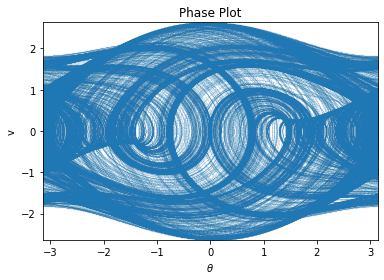

In [ ]:
RK2(0.2,0,10000,0.01,2,1.5,late=True)

In [ ]:
def poincare(theta0, v0, tau_final, delta_tau, Q, A, late,xmin,xmax,ymin,ymax):
    theta = theta0
    v = v0
    tau = 0 
    N = int(tau_final/delta_tau)
    thetas = []  
    vs = []  
    taus = [] 
    omega=2/3
    n=int(omega*tau_final/4/m.pi)+1
    for i in range(N):
        k1 = delta_tau * f(v)
        q1 = delta_tau * g(theta, v, tau, Q, A)
        k2 = delta_tau*f(v+q1/2)
        q2 = delta_tau*g(theta+k1/2, v+q1/2, tau+delta_tau/2, Q, A)
        theta += k2
        if theta > m.pi:
          theta-=2*m.pi
        elif theta< -m.pi:
          theta+= 2*m.pi
        v += q2
        tau += delta_tau
        if late == True:
            if tau > tau_final/2. and abs(tau-2*n*m.pi/omega) < delta_tau/2:
              thetas.append(theta)
              vs.append(v)
              taus.append(tau)
              n+=1
        else:
          thetas.append(theta)
          vs.append(v)
          taus.append(tau)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.plot(thetas, vs,'.',markersize=1)       
    plt.xlabel(r'$\theta$')
    plt.ylabel('v')
    plt.title('Poincare Section');             

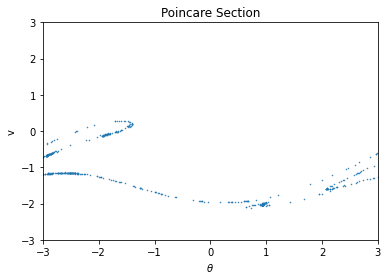

In [ ]:
poincare(0.2,0,10000,0.01,2,1.5,True,-3,3,-3,3)